In [2]:
from elasticsearch import Elasticsearch
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, Text
from sqlalchemy.orm import sessionmaker
from sqlalchemy.ext.declarative import declarative_base
from tqdm import tqdm

Base = declarative_base()


class Question(Base):
    __tablename__ = 'questions'
    id = Column(Integer, primary_key=True)
    question = Column(Text, nullable=False)
    answer = Column(Text, nullable=False)
    
    def __init__(self, text, answer):
        self.question = text
        self.answer = answer


def init_db(db_url):
    engine = create_engine(db_url)
    Base.metadata.bind = engine
    Base.metadata.create_all()
    return sessionmaker(bind=engine)


db_session = init_db('sqlite:///chgk.db')()

In [3]:
import numpy as np

In [4]:
data = [instance.question for instance in db_session.query(Question)]

In [70]:
tf_map = {}
i = 0
for text in data:
    i += 1
    words = text.split(' ')
    for w in words:
        if not w.isidentifier():
            continue
        word = w.lower()
        if word not in tf_map.keys():
            tf_map[word] = 0
        tf_map[word] += 1

In [71]:
import operator
sorted_map = sorted(tf_map.items(), key=operator.itemgetter(1), reverse=True)

In [72]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

def format_fn(tick_val, tick_pos):
    if int(tick_val) in xs:
        return labels[int(tick_val)]
    else:
        return ''

['в', 'и', 'на', 'что', 'из', 'назовите', 'не', 'с', 'а', 'это']


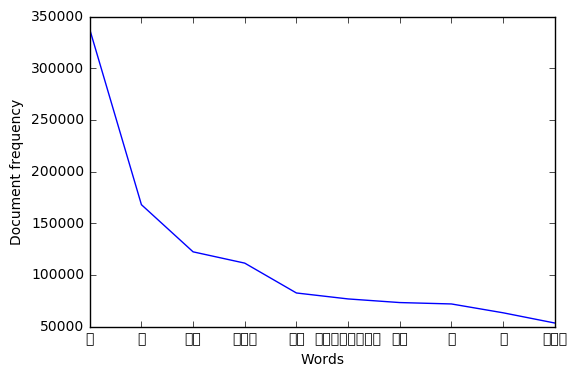

In [76]:
cutted_map = sorted_map[:10]
fig = plt.figure()
ax = fig.add_subplot(111)
labels = [x[0] for x in cutted_map]
print(labels)

ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot([x[1] for x in cutted_map])

plt.ylabel('Document frequency')
plt.xlabel('Words')
plt.show()